# Homework 1: introduction and visualisations

### PA Women in Tech: Intro to Data Science with Python

In this homework you will look at **importing, exploring and visualising data**. You will:
* load data from a CSV
* explore data
* visualise data
* conduct some basic data analysis

Make sure your data file is located in the same folder as this Jupyter Notebook file (or you will have to provide the full path for the file location).

## Dataset description

We will be using the dataset in the file `TitanicData.csv` for this homework, which contains passenger information from the Titanic's first and last trip.

The columns are:
* PassengerId
* Survived (1: yes, 0: no)
* Pclass (booking class: can be 1, 2 or 3)
* Name
* Sex (can be male or female)
* Age
* SibSp (number of accompanying siblings and spouse)
* Parch (number of accompanying parents and children)
* Ticket reference (e.g. PC 17599)
* Fare (cost)
* Cabin (e.g. C85)
* Embarked (where passengers embarked from: Southampton (S), Cherbourg (C), and Queenstown (Q))

Firstly, the necessary packages are imported (make sure you run the cell):

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Load and explore the data

1.a. Load the `TitanicData.csv` file into a DataFrame using pandas and have a look at the first few lines

In [4]:
df = pd.read_csv('TitanicData.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1.b. Call the `describe` method on the DataFrame to conduct some quick statistical analysis on the data, and take a look at the results. Can you answer the following questions?
* How many rows of data are there?
* What was the average age of passenger?
* What was the maximum number of accompanying parents and children?

In [5]:
df.describe()

# Contains 8 rows
# Average age of passenger 29 years old.
# 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


If you want to, take a look at this link for the [describe method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) to read about this method further.

Part of what the `describe` method returns are the **quartiles** - these are the columns with `25%` (lower quartile), `50%` (median) and `75%` (upper quartile). Quartiles are the data broken down into quarters, so that 25% of the measurements are less than the lower quartile, 50% are less than the median, and 75% are less than the upper quartile.

A boxplot is a way to show the spread and centers of a data set by giving a visual representation of the quartiles. You can find info on plotting boxplots with pandas [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html)

This type of plot is used to easily detect **outliers**. An outlier is an observation point that is distant from other observations. It can also tell us if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed. Read more on finding outliers from boxplots [here](https://medium.com/@agarwal.vishal819/outlier-detection-with-boxplots-1b6757fafa21)

1.c. Plot pandas boxplots from the DataFrame. Can you see any outliers?

Hint: You can use the `figsize` keyword argument to set the sizes of the figures. The default size might be a bit too small & not format very well!

Hint: You can use the `subplots` keyword argument to set whether the plots are plotted as separate subplots, or on the same plot.

PassengerId       Axes(0.125,0.653529;0.227941x0.226471)
Survived       Axes(0.398529,0.653529;0.227941x0.226471)
Pclass         Axes(0.672059,0.653529;0.227941x0.226471)
Age               Axes(0.125,0.381765;0.227941x0.226471)
SibSp          Axes(0.398529,0.381765;0.227941x0.226471)
Parch          Axes(0.672059,0.381765;0.227941x0.226471)
Fare                  Axes(0.125,0.11;0.227941x0.226471)
dtype: object

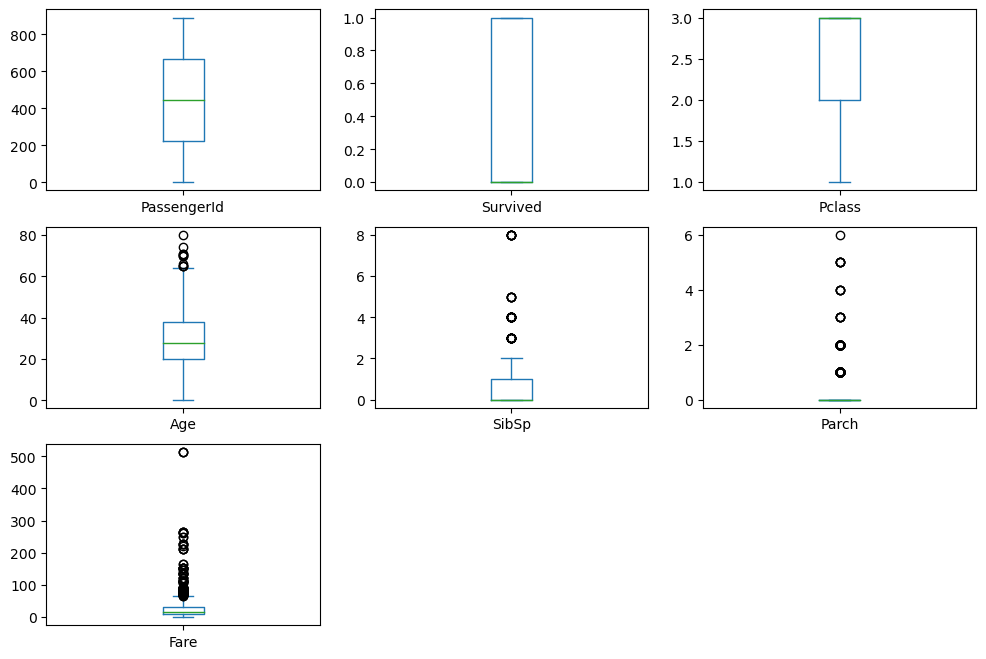

In [7]:
df.plot(
    kind="box",
    subplots=True,
    layout=(3,3),
    figsize=(12,8)
)

Boxplots can be plotted using the Matplotlib package as well. Here is an example of plotting 3 boxplots on the same graph for the PClass, SibSp and Parch columns:

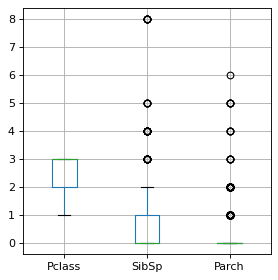

In [8]:
fig = plt.figure(figsize=(4, 4), dpi=80, facecolor="w", edgecolor="k")
boxplot = df.boxplot(column=["Pclass", "SibSp", "Parch"])

1.d. Plot pandas [histograms](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html) of all the data for *surviving* passengers. A histogram is a column chart that shows frequency data.

Hint: You can filter the DataFrame using a function like `df[df["Survived"] == 1]`

Hint: You can use the `figsize` keyword argument to set the sizes of the figures. The default size might be a bit too small & not format very well!

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

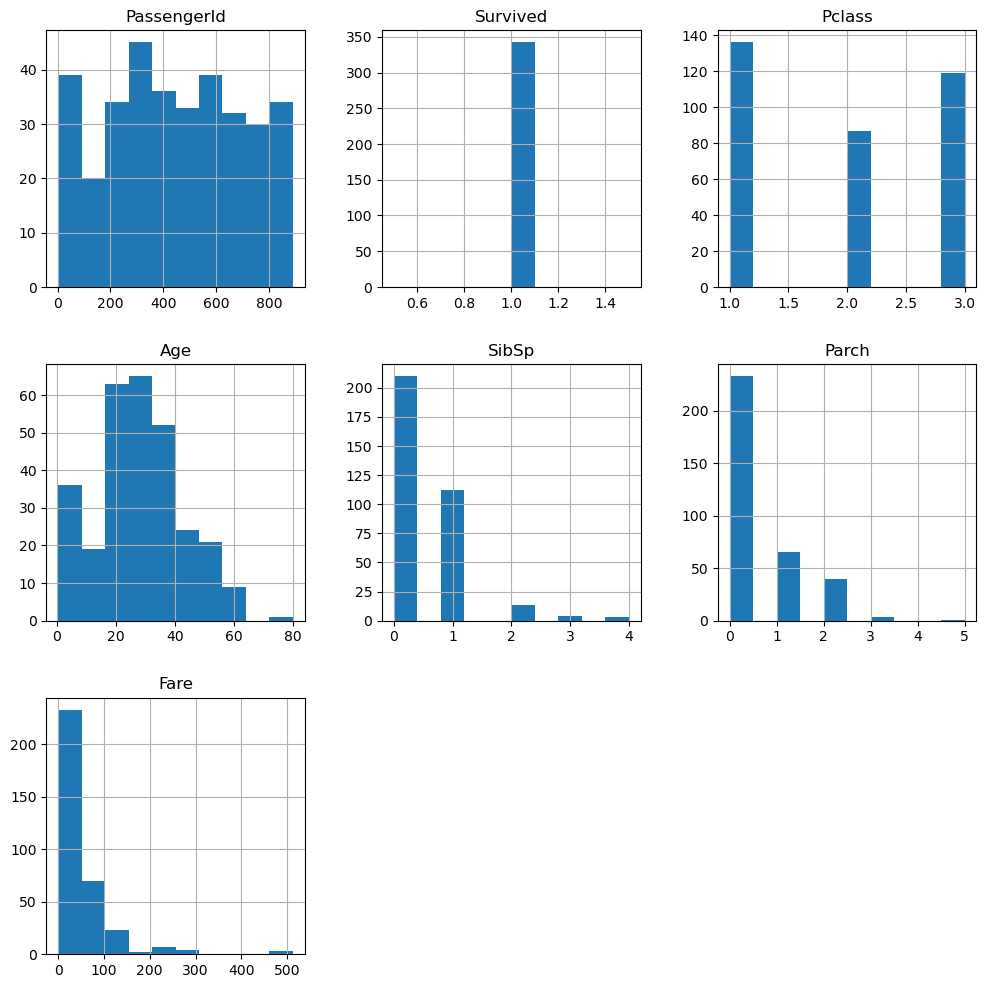

In [9]:
df[df["Survived"] == 1].hist(figsize=(12,12))

# Survival analysis

Now we have done some exploration of the data, we will try and do some basic analysis on passenger survival.

2.a. Complete the code below to plot the distribution of Fare prices (y) among surviving categories against Sex (x) using a [seaborn boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

Take a look at the plot and think about the obtained results!
* Where are the quartiles for each boxplot?
* What difference does Fare make in how many people survived?

Hint: use the `hue` keyword argument to plot multiple boxplots for each category in a column with different colours (e.g. Survived).

(0.0, 100.0)

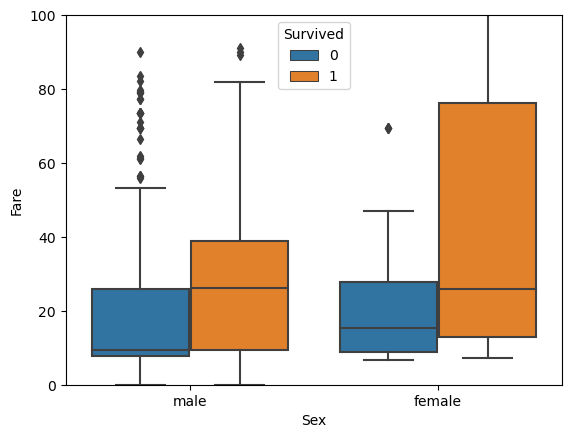

In [13]:
sns.boxplot(x="Sex", y="Fare", data=df, hue="Survived")
plt.ylim(0, 100)

2b. Use a [seaborn countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html) to check the count of survival among male and female passengers.

<Axes: xlabel='Sex', ylabel='count'>

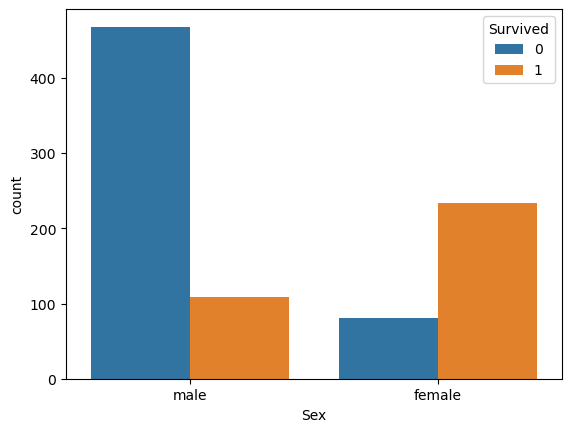

In [16]:
sns.countplot(x="Sex", hue="Survived", data=df)

2c. Use a [seaborn countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html) to check the count of survival among the 3 booking classes.

<Axes: xlabel='Pclass', ylabel='count'>

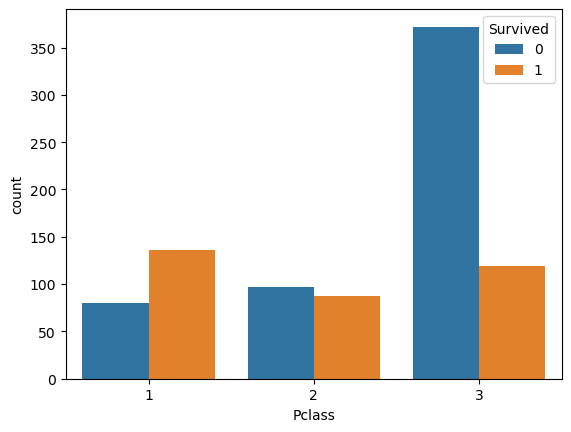

In [17]:
sns.countplot(x="Pclass", hue="Survived", data=df)

2d. Use a [seaborn countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html) to check the count of survival among the 3 embarkment places.

<Axes: xlabel='Embarked', ylabel='count'>

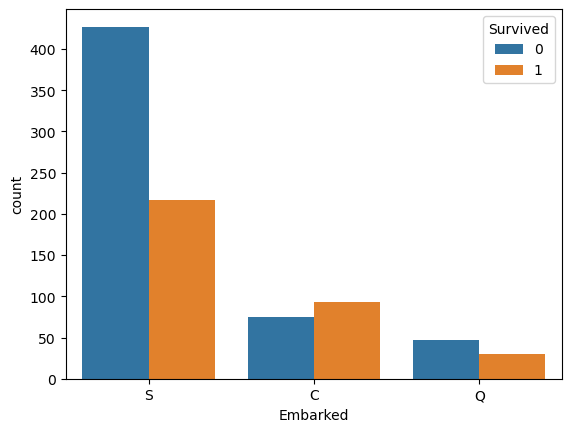

In [18]:
sns.countplot(x="Embarked", hue="Survived", data=df)

Finally, we'll try and compute some percentage statistics of survival in different categories.

We will use the DataFrame `loc` method, which allows us to filter data from a DataFrame.

To calculate the percentage of surviving women, we can do the following:

In [19]:
women = df.loc[df.Sex == "female"]["Survived"]
rate_women = (sum(women) / len(women)) * 100
print("% of women who survived:", rate_women)

% of women who survived: 74.20382165605095


2e. In the following cells, calculate the percentages of:
* surviving men
* surviving women who embarked from Cherbourg
* surviving women from 1st class
* surviving men from each class (hint: to split a DataFrame out by category, use the `groupby` method. You can also use the `sum` and `count` methods on a DataFrame)

In [20]:
men = df.loc[df.Sex == "male"]["Survived"]
rate_men = (sum(men) / len(men)) * 100
print("% of men who survived:", rate_men)

% of men who survived: 18.890814558058924


In [21]:
women_cherbourg = df.loc[(df.Sex == "female") & (df.Embarked == "C")]["Survived"]
rate_women_cherbourg = (sum(women_cherbourg) / len(women_cherbourg)) * 100
print("% of women who survived from Cherbourg:", rate_women_cherbourg)

% of women who survived from Cherbourg: 87.67123287671232


Finally, have a think about what these percentages tell us, and what other questions might it prompt us to answer? Which variables might be the most important in influencing the survival outcome of a passenger?